In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.18.0'

In [3]:
dataset = pd.read_csv('Suicidal_redit.csv',usecols=['Title','Post','Label'])

In [4]:
X = dataset.iloc[:15000, :-1].values

In [5]:
print(X)

[["I'm looking for a girl I've met at the Polish airport to thank her properly!"
  "I've tried Polish spotted pages but I guess she isn't there. But I know she's active on this sub so... WHY THE HELL NOT?\n\nIf you see this - you don't need to let me know. Just read it. I just want to thank you for not being indifferent.\n\n2 weeks ago I was in a very bad place. My gf broke up with me just before I got into the plane and I landed just to find out my luggage got lost and like the last idiot I had there my cards and money. And I don't know Polish language. Like a real, adult man, I just sat there and cried like a baby, exhausted after very long trip.\n\nThat Polish girl came already holding a cup with hot chocolate for me, asking if she could help in any way. We talked, she helped me with the luggage, helped me with the directions to my hotel and gave me money to get there. And we started talking about random things (like reddit) and for that I'm very thankful, you distracted me. \n\nI c

In [7]:
import re
import nltk 
nltk.download('stopwords') #These are words which are 'the','a' etc not helping in getting sentiment
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prafu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [8]:
corpus = []
for i in range(0,15000):
    text = X[i] 
    if isinstance(text, float): 
        text = "" 
    review = re.sub('[^a-zA-Z]',' ', str(text))
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    filter_review = []
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    for word in review:
        if not word in set(all_stopwords):
            filter_review.append(ps.stem(word))

    filter_review = ' '.join(filter_review)
    corpus.append(filter_review)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1400)
X = cv.fit_transform(corpus).toarray()
y = dataset['Label'].iloc[:15000].values

In [13]:
print(y)

['Non-Suicidal' 'Non-Suicidal' 'Non-Suicidal' ... 'Suicidal' 'Suicidal'
 'Suicidal']


In [14]:
from sklearn.preprocessing import LabelEncoder
sc = LabelEncoder()
y = sc.fit_transform(y)

In [15]:
print(np.unique(y))

[0 1]


In [16]:
for label in np.unique(y):
    print(label)

0
1


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [18]:
ann = tf.keras.models.Sequential()

In [19]:
ann.add(tf.keras.layers.Dense(units = 6, activation='relu'))

In [20]:
ann.add(tf.keras.layers.Dense(units = 6, activation='relu'))

In [21]:
ann.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [22]:
ann.compile(optimizer ='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [23]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
375/375 [==============================] - 3s 2ms/step - loss: 0.3951 - accuracy: 0.8655
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1945 - accuracy: 0.9392
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1532 - accuracy: 0.9506
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1358 - accuracy: 0.9550
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1211 - accuracy: 0.9608
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1095 - accuracy: 0.9635
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0985 - accuracy: 0.9671
Epoch 8/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0884 - accuracy: 0.9720
Epoch 9/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0744 - accuracy: 0.9772
Epoch 10/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0641 - accura

In [24]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

94/94 [==============================] - 0s 1ms/step
[[1 0]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [0 0]]


0.9156666666666666
              precision    recall  f1-score   support

       False       0.93      0.92      0.92      1618
        True       0.90      0.91      0.91      1382

    accuracy                           0.92      3000
   macro avg       0.91      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



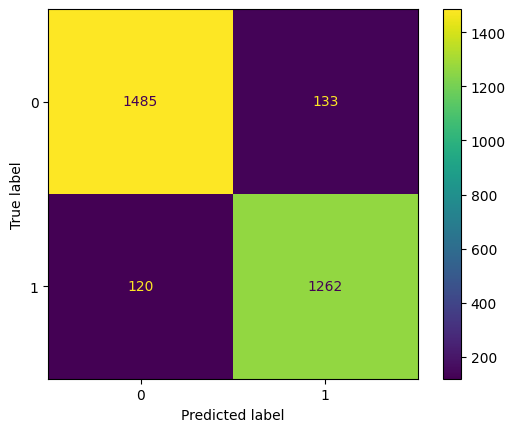

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_pred, y_test)
print(accuracy_score(y_pred, y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(classification_report(y_pred, y_test))

In [27]:
ann.save("sentiment_ann.keras") 

In [28]:
from tensorflow.keras.models import load_model
ann = load_model("sentiment_ann.keras")
